Below, we're going to demonstrate using one of the ready-to-download, open-access datasets from TorchVision, how to transform the images for consumption by your model, and how to use the DataLoader to feed batches of data to your model.

The first thing we need to do is transform our incoming images into a PyTorch tensor.

In [20]:
import matplotlib

import torch
import torchvision
import torchvision.transforms as transforms

%matplotlib inline


In [21]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Here, we specify two transformations for our input:
* `transforms.ToTensor()` converts images loaded by Pillow into PyTorch tensors.
* `transforms.Normalize()` adjusts the values of the tensor so that their average is zero and their standard deviation is 0.5. Most activation functions have their strongest gradients around x = 0, so centering our data there can speed learning.

There are many more transforms available, including cropping, centering, rotation, and reflection.

Next, we'll create an instance of the CIFAR10 dataset. This is a set of 32x32 color image tiles representing 10 classes of objects: 6 of animals (bird, cat, deer, dog, frog, horse) and 4 of vehicles (airplane, automobile, ship, truck):

In [22]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

Files already downloaded and verified


*Note: When you run the cell above, it may take a little time for the dataset to download.*

This is an example of creating a dataset object in PyTorch. Downloadable datasets (like CIFAR-10 above) are subclasses of `torch.utils.data.Dataset`. `Dataset` classes in PyTorch include the downloadable datasets in TorchVision, Torchtext, and TorchAudio, as well as utility dataset classes such as `torchvision.datasets.ImageFolder`, which will read a folder of labeled images. You can also create your own subclasses of `Dataset`.

When we instantiate our dataset, we need to tell it a few things:
* The filesystem path to where we want the data to go
* Whether or not we are using this set for training; most datasets will be split into training and test subsets.
* Whether we would like to download the dataset if we haven't already
* The transformations we want to apply to the data

Once your dataset is ready, you can give it to the `DataLoader`:

In [23]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

A `Dataset` subclass wraps access to the data, and is specialized to the type of data it's serving. The `DataLoader` knows *nothing* about the data, but organizes the input tensors served by the `Dataset` into batches with the parameters you specify.

In the example above, we've asked a `DataLoader` to give us batches of 4 images from `trainset`, randomizing their order (`shuffle=True`), and we told it to spin up two workers to load data from disk.

It's good practice to visualize the batches your `DataLoader` serves:

 ship  ship horse  bird


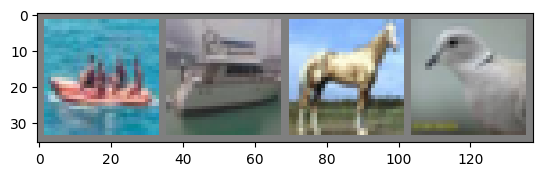

In [26]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Running the above cell should show you a strip of four images, and the correct label for each.